In [1]:
### Import packages
from DeepDA_lib import LMR_DA
from DeepDA_lib import modules_nc
from DeepDA_lib import DeepDA_psm
import h5py
import time
import yaml
import numpy as np
import pandas
import os
import shutil
from netCDF4 import Dataset
import numpy.ma as ma
import numpy.matlib as mat
import scipy.stats as stats
from sys import platform as sys_pf
import matplotlib.pyplot as plt
if sys_pf == 'darwin':
    import matplotlib
    matplotlib.use("TkAgg")
    import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap, shiftgrid, cm

In [93]:
waterdepthi = 100
ki = modules_nc.calc_find_k(waterdepthi, 16)
print(16-ki[0])

exp1 = np.arange(15).reshape(3, 5)
exp2 = exp1[1,:]
print(exp2)

1
[5 6 7 8 9]


In [7]:
a = np.random.rand(3,2)
print(a)
a[1,1] = -3
a[1,0] = np.nan
print(a)
np.any(a<-5)

[[0.69599352 0.70052941]
 [0.3248488  0.45653945]
 [0.65950025 0.14468126]]
[[ 0.69599352  0.70052941]
 [        nan -3.        ]
 [ 0.65950025  0.14468126]]


/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


False

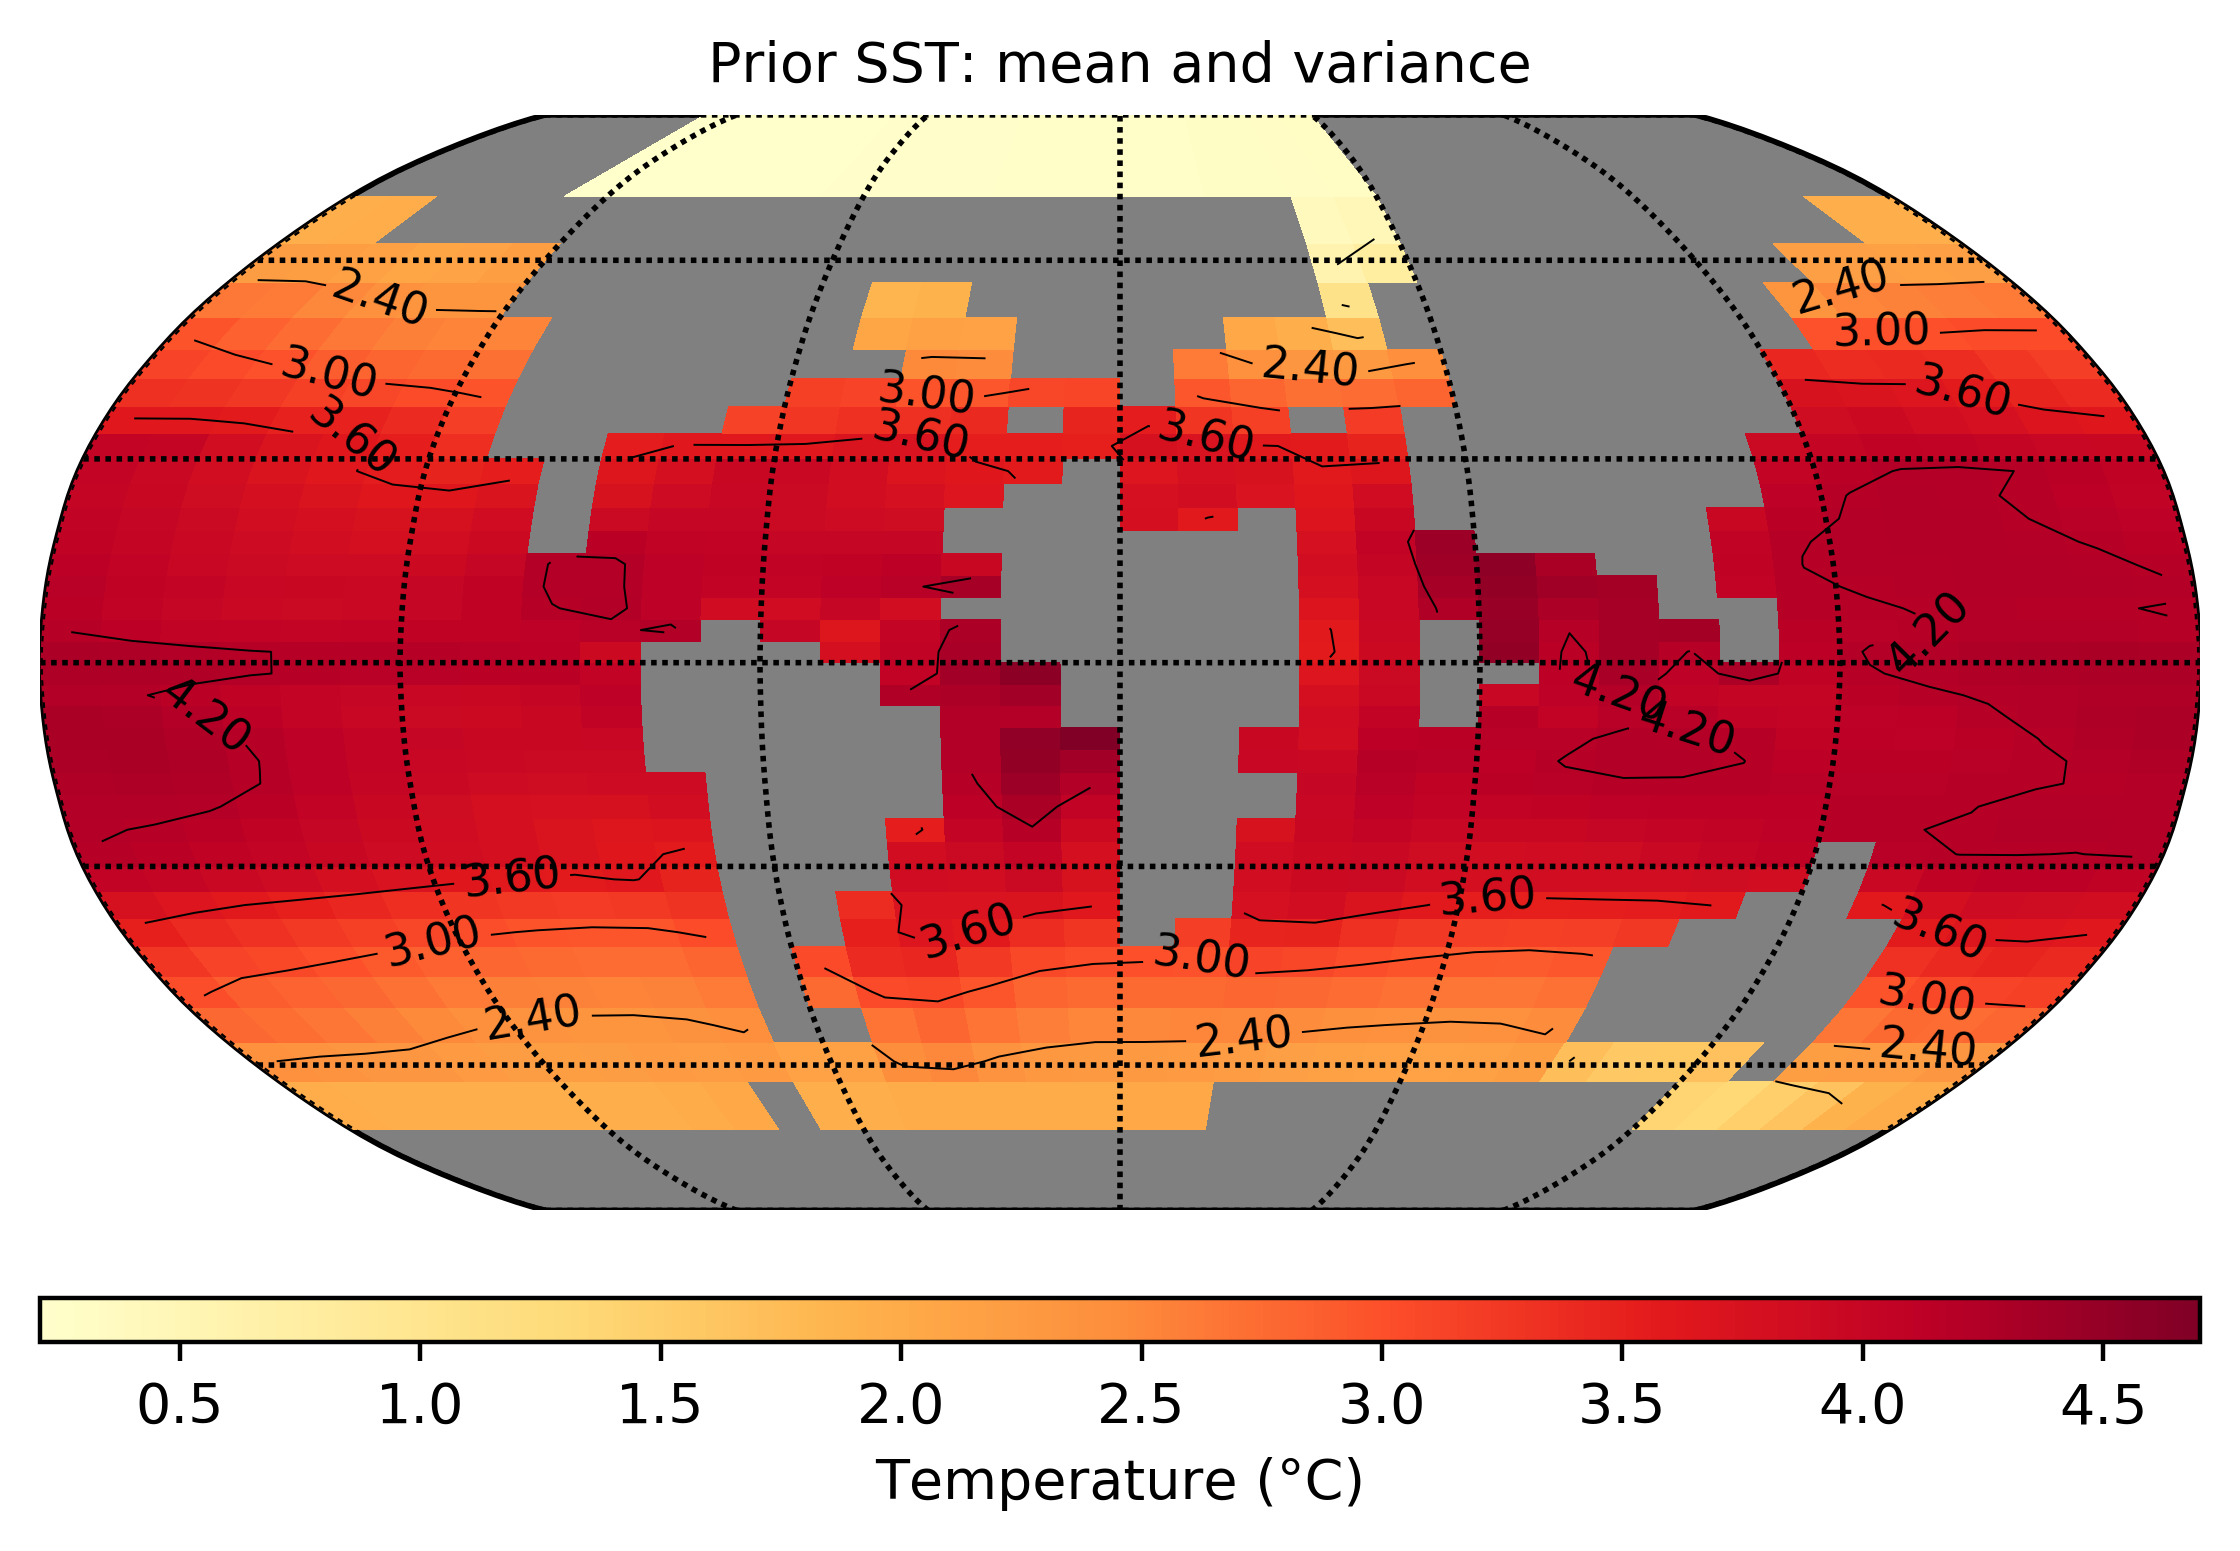

In [32]:
priordir = '/mnt/d/cGENIE/ML.petm/ML.petm009/'
id1 = 'ML.petm009.ID.4'
id1ext = '/biogem/fields_biogem_3d.nc'
t = 0
k = 0
x = Dataset(priordir+id1+id1ext).variables['carb_ohm_cal'][t,k,:,:] # time-lat-lon  | bottom water omega

cGENIEGridBound = '/mnt/c/Users/mul450/Dropbox/git/petmda/data/cGENIEGridBound.csv' # cGENIE grid bound
cGENIEGrid = '/mnt/c/Users/mul450/Dropbox/git/petmda/data/cGENIEGrid.csv' # cGENIE grid bound

dum_lon_offset = -180   # offset; doesn't need change
dum_imax = 36           # matrix length; doesn't need change
dum_jmax = 36           # matrix length; doesn't need change
dum_kmax = 16           # depth; doesn't need change
dum_ij = dum_jmax * dum_imax

# ========= dataset for plot =========
cGENIEGridB = pandas.read_csv(cGENIEGridBound)
lat90 = cGENIEGridB['lat']
lon90 = cGENIEGridB['lon']
X,Y = np.meshgrid(lon90,lat90)
#X2,Y2 = np.meshgrid(np.arange(0,361,10),lat90)

# ========= dataset for plot =========
cGENIEGrid = pandas.read_csv(cGENIEGrid)
#print(cGENIEGrid)
cGENIEGridB_lat36 = cGENIEGrid['lat']
cGENIEGridB_lon36 = cGENIEGrid['lon']
X36, Y36 = np.meshgrid(cGENIEGridB_lon36, cGENIEGridB_lat36)
#X236, Y236 = np.meshgrid(cGENIEGridB_lon36+180, cGENIEGridB_lat36)
gridlat = Y36.reshape((dum_ij,))  # lat for each grid

xbm = x.copy()
xbmv = xbm
ploti = 1
if ploti == 1:
    # plot mean of prior
    fig = plt.figure(figsize=(6, 4.5), dpi=400)
    ax = fig.add_axes([0.05,0.05,0.9,0.9])
    m = Basemap(projection='robin', lon_0=0, lat_0 =0, resolution=None)
    # might consider 'cea', 'mbtfpq', 'moll', 'hammer', or 'robin' (recommended) projection
    m.drawmapboundary(fill_color='0.5')
    im1 = m.pcolormesh(X,Y,xbm,shading='flat',cmap=plt.cm.YlOrRd,latlon=True)
    m.drawparallels(np.arange(-90.,99.,30.))
    m.drawmeridians(np.arange(-180.,180.,60.))
    cb = m.colorbar(im1,"bottom", size="4%", pad="8%")
    cb.ax.tick_params(labelsize=10)
    cb.set_label(u'Temperature (\u00B0C)', fontsize=10)
    ax.set_title('Prior SST: mean and variance', fontsize = 10)
    # overlay variance
    #x, y = m(X36,Y36)
    x,y = m.shiftdata(X36,Y36)
    #print(x)
    varCP = m.contour(x, y, xbmv, latlon=True, linewidths=0.35, colors ='black')
    plt.clabel(varCP, inline= True, fmt='%1.2f', fontsize = 8, colors='k')
    plt.show()
    #plt.savefig('PriorSST.pdf')

In [75]:
a = np.array([[1, np.nan], [3, 4],[7,8]])
a_3d_array = np.array([[[1, 2], [3, np.nan]], [[5, 6], [7, 8]] , [[9, 10], [11, 122]]])
print(a_3d_array.shape)
print(a_3d_array[:])

n1 = np.nanmean(a_3d_array,axis=0)
#np.nanmean(a_3d_array,axis=1)

#np.nanmean(a_3d_array,axis=2)


n2 = np.nanmean(n1,axis=0)
print(n1)
print(n2)

t = a_3d_array.reshape((6,2))
print(t)
print(np.nanmean(t,axis=0))

(3, 2, 2)
[[[  1.   2.]
  [  3.  nan]]

 [[  5.   6.]
  [  7.   8.]]

 [[  9.  10.]
  [ 11. 122.]]]
[[ 5.  6.]
 [ 7. 65.]]
[ 6.  35.5]
[[  1.   2.]
 [  3.  nan]
 [  5.   6.]
 [  7.   8.]
 [  9.  10.]
 [ 11. 122.]]
[ 6.  29.6]
